In [ ]:
# This is for a plotting branch -- test
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
file_path1 = "/mnt/Projects/climate_data/AgERA5/barbados/agera5_lwf_barbados_daily.nc"
file_path2 = "/mnt/Projects/climate_data/AgERA5/barbados/agera5_pet_barbados_daily.nc"
file_path3 = "/mnt/Projects/climate_data/AgERA5/barbados/agera5_pet-har_barbados_daily.nc"
file_path4 = "/mnt/Projects/climate_data/AgERA5/barbados/agera5_precip_barbados_daily.nc"
file_path5 = "/mnt/Projects/climate_data/AgERA5/barbados/agera5_swe_barbados_daily.nc"
file_path6 = "/mnt/Projects/climate_data/AgERA5/barbados/agera5_swrad_barbados_daily.nc"

ds_lwf = xr.open_dataset(file_path1,engine='netcdf4')
ds_pet = xr.open_dataset(file_path2,engine='netcdf4')
ds_pet_har = xr.open_dataset(file_path3,engine='netcdf4')
ds_precip = xr.open_dataset(file_path4,engine='netcdf4')
ds_swe = xr.open_dataset(file_path5,engine='netcdf4')
ds_swrad = xr.open_dataset(file_path6,engine='netcdf4')

print(ds_lwf.keys())
print(ds_pet_har.keys())
print(ds_precip.keys())
print(ds_swe.keys())
print(ds_swrad.keys())

KeysView(<xarray.Dataset> Size: 11MB
Dimensions:  (time: 16629, lat: 13, lon: 12)
Coordinates:
  * time     (time) datetime64[ns] 133kB 1979-01-01 1979-01-02 ... 2024-07-11
  * lat      (lat) float64 104B 13.8 13.7 13.6 13.5 13.4 ... 12.9 12.8 12.7 12.6
  * lon      (lon) float64 96B -60.1 -60.0 -59.9 -59.8 ... -59.2 -59.1 -59.0
Data variables:
    lwf      (time, lat, lon) float32 10MB ...)
KeysView(<xarray.Dataset> Size: 11MB
Dimensions:  (time: 16629, lat: 13, lon: 12)
Coordinates:
  * time     (time) datetime64[ns] 133kB 1979-01-01 1979-01-02 ... 2024-07-11
  * lat      (lat) float64 104B 13.8 13.7 13.6 13.5 13.4 ... 12.9 12.8 12.7 12.6
  * lon      (lon) float64 96B -60.1 -60.0 -59.9 -59.8 ... -59.2 -59.1 -59.0
Data variables:
    pet_har  (time, lat, lon) float32 10MB ...)


# import data arrays

In [44]:
lwf = ds_lwf['lwf']
pet = ds_pet['pet']
pet_har = ds_pet_har['pet_har']
precip = ds_precip['precip']
swe = ds_swe['swe']
swrad = ds_swrad['swrad']




# Compute and plot the temporal mean

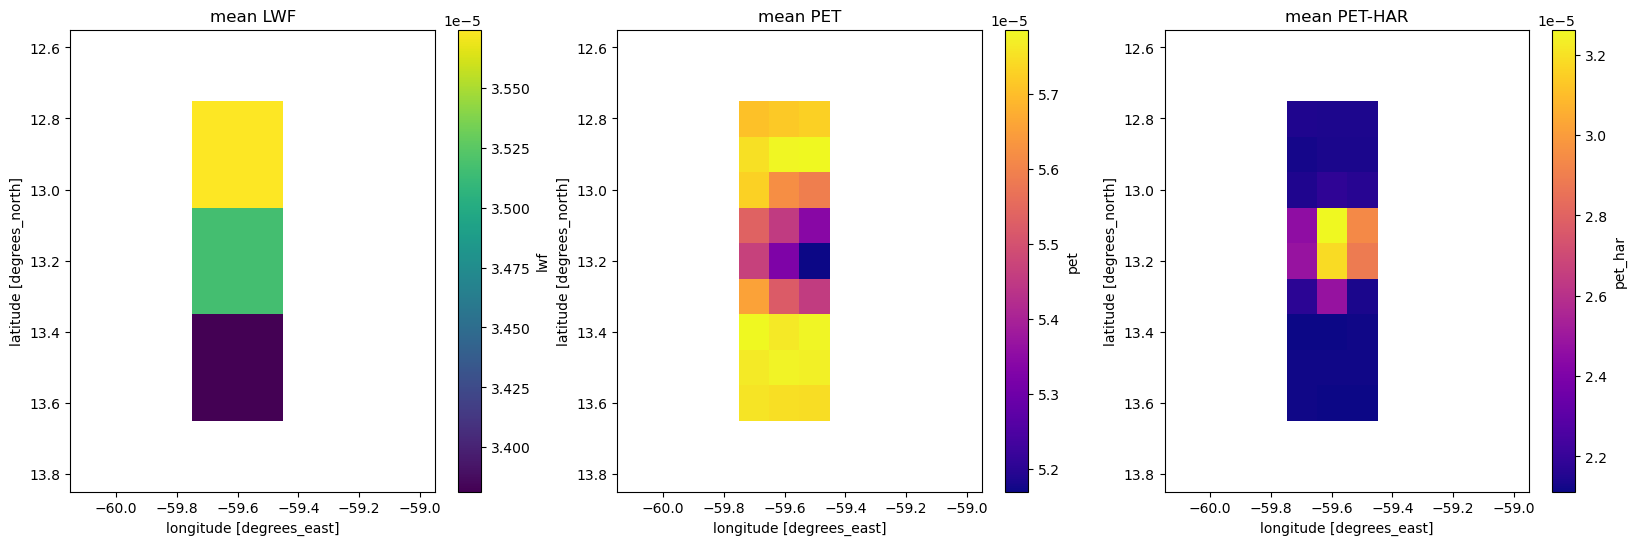

In [46]:
# Select a specific time index
lwf_mean = lwf.mean(dim=["time"])
pet_mean = pet.mean(dim=["time"])
pet_har_mean = pet_har.mean(dim=["time"])
precip_mean = precip.mean(dim=["time"])
swe_mean = swe.mean(dim=["time"])
swrad_mean = swrad.mean(dim=["time"])

# subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))  

# Plot 
lwf_mean.plot.imshow(x='lon', y='lat', cmap='viridis', ax=axs[0], origin='lower')
pet_mean.plot.imshow(x='lon', y='lat', cmap='plasma', ax=axs[1], origin='lower')
pet_har_mean.plot.imshow(x='lon', y='lat', cmap='plasma', ax=axs[2], origin='lower')

axs[0].set_title('mean LWF')
axs[1].set_title('mean PET')
axs[2].set_title('mean PET-HAR')

#axs[1].set_xlabel('Longitude')



# Show the plot
plt.show()

# compute and plot the spatial mean

In [33]:
lwf_mean = lwf.mean(dim=["lat", "lon"])  # Averaging 
pet_mean = pet.mean(dim=["lat", "lon"])  # Averaging 
pet_har_mean = pet_har.mean(dim=["lat", "lon"])  


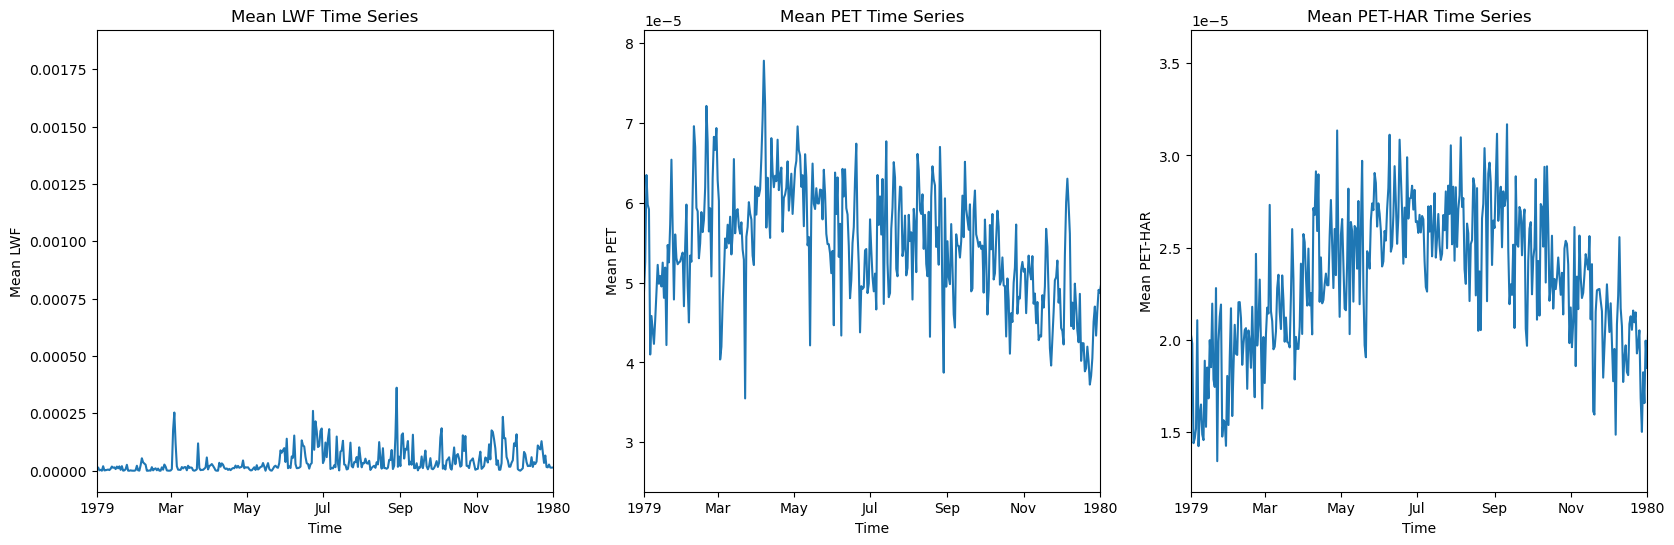

In [37]:
# Select a specific time range to show
time_range_start = '1979-01-01T00:00:00'  
time_range_end = '1980-01-01T00:00:00'   

fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 

# Plotting
lwf_mean.plot.line(ax=axs[0])
axs[0].set_title('Mean LWF Time Series')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Mean LWF')
pet_mean.plot.line(ax=axs[1])
axs[1].set_title('Mean PET Time Series')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Mean PET')
pet_har_mean.plot.line(ax=axs[2])
axs[2].set_title('Mean PET-HAR Time Series')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Mean PET-HAR')

axs[0].set_xlim([np.datetime64(time_range_start), np.datetime64(time_range_end)])
axs[1].set_xlim([np.datetime64(time_range_start), np.datetime64(time_range_end)])
axs[2].set_xlim([np.datetime64(time_range_start), np.datetime64(time_range_end)])


plt.show()